#### Get the Kaggle.json file

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charanrajshetty","key":"3c08892785413b3035b5dff5ca9a4a4e"}'}

#### Create directory and copy the json file

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

#### Download the kaggle dataset

In [ ]:
!kaggle datasets download ravirajsinh45/real-life-industrial-dataset-of-casting-product

 82% 82.0M/100M [00:01<00:00, 41.8MB/s]
100% 100M/100M [00:02<00:00, 52.0MB/s] 


#### Unzip the kaggle dataset

In [ ]:
!unzip real-life-industrial-dataset-of-casting-product.zip

Streaming output truncated to the last 5000 lines.
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: cas

#### Import the Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

#### Set the params

In [ ]:
image_shape = (300,300,1)
batch_size = 32

#### View the random images

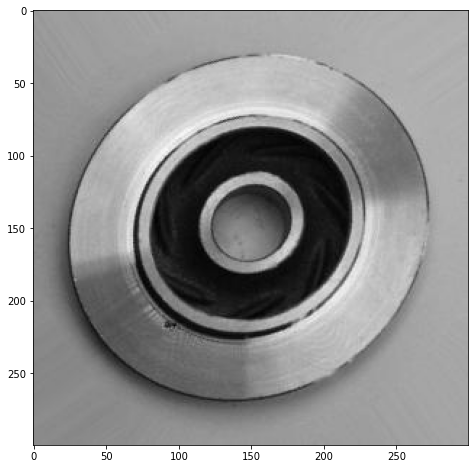

In [ ]:
img = plt.imread('/content/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

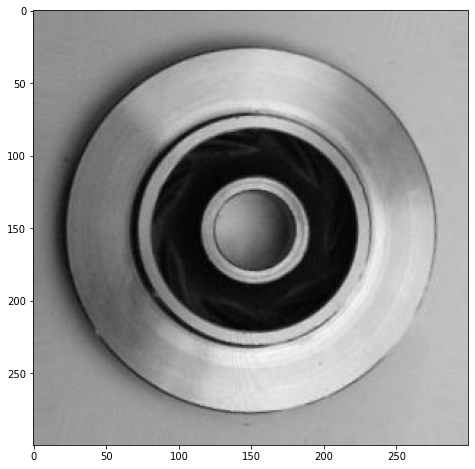

In [ ]:
# view some images
img = plt.imread('/content/casting_data/casting_data/test/ok_front/cast_ok_0_10.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

#### Data cleaning and preprocessing

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_path='/content/casting_data/casting_data/train'
test_path='/content/casting_data/casting_data/test'

In [ ]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

#### Create the Sequential models

In [ ]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

#### Add the compilation params for model training

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Train and Validate the data

In [ ]:
results = model.fit(train_set,epochs=20,
                              validation_data=test_set)

Epoch 1/20
208/208 [==============================] - 53s 101ms/step - loss: 0.4267 - accuracy: 0.7953 - val_loss: 0.1392 - val_accuracy: 0.9566
Epoch 2/20
208/208 [==============================] - 21s 99ms/step - loss: 0.1314 - accuracy: 0.9613 - val_loss: 0.0881 - val_accuracy: 0.9664
Epoch 3/20
208/208 [==============================] - 20s 98ms/step - loss: 0.0652 - accuracy: 0.9792 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 4/20
208/208 [==============================] - 20s 98ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0420 - val_accuracy: 0.9930
Epoch 5/20
208/208 [==============================] - 20s 97ms/step - loss: 0.0188 - accuracy: 0.9956 - val_loss: 0.0327 - val_accuracy: 0.9930
Epoch 6/20
208/208 [==============================] - 20s 96ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 7/20
208/208 [==============================] - 20s 98ms/step - loss: 0.0161 - accuracy: 0.9955 - val_loss: 0.0551 - val_accuracy

#### Calculate and plot the losses

In [ ]:
losses = pd.DataFrame(model.history.history)

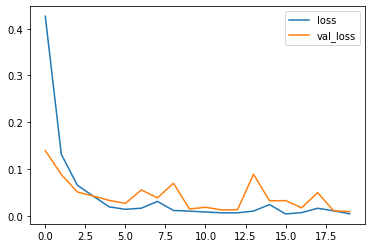

In [ ]:
losses[['loss','val_loss']].plot()

#### #### Calculate and plot the accuracy

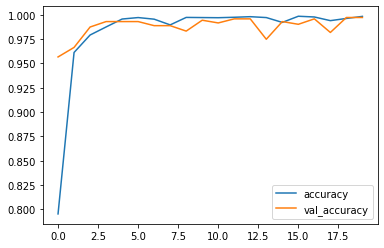

In [ ]:
losses[['accuracy','val_accuracy']].plot()

#### Predict the test dataset

In [ ]:
pred_probability = model.predict_generator(test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
predictions = pred_probability > 0.5

#### View the evaluation metrics

In [ ]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



#### Check the Confusion Matrix

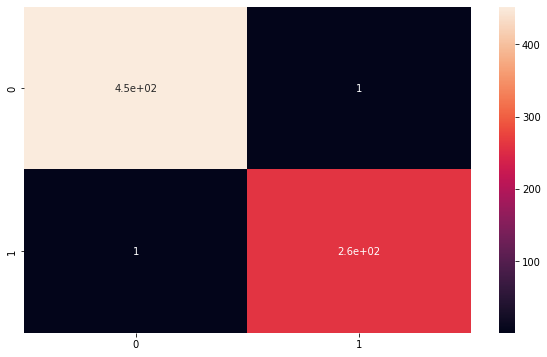

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)